# GlobeM Dataset Exploration
## Data Import and Setup

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler as scaler

def import_feature_data(file_name):
    df = pd.read_csv('./csv_data/INS-W_1/FeatureData/'+file_name+'.csv')
    return df

def import_survey_data(file_name):
    df = pd.read_csv('./csv_data/INS-W_1/SurveyData/'+file_name+'.csv')
    return df

def normalize_data(df):
    data_numeric = df.select_dtypes(include=[float])
    data_normalized = pd.DataFrame(scaler.fit_transform(data_numeric), columns=data_numeric.columns)
    data_normalized = data_normalized.dropna(axis=1, how='all')
    return data_normalized

In [11]:
rapids = import_feature_data('rapids')
rapids.drop(columns=['Unnamed: 0'], inplace=True)
rapids.set_index('pid', inplace=True)

# Importing survey data, merge it with rapids data on PID
# dep endterm data
dep_endterm = import_survey_data('dep_endterm')
dep_endterm.drop(columns=['Unnamed: 0'], inplace=True)
dep_endterm.set_index('pid', inplace=True)
# pre
pre = import_survey_data('pre')
pre.drop(columns=['Unnamed: 0'], inplace=True)
pre.set_index('pid', inplace=True)
# post
post = import_survey_data('post')
post.drop(columns=['Unnamed: 0'], inplace=True)
post.set_index('pid', inplace=True)
# dep_weekly
dep_weekly = import_survey_data('dep_weekly')
dep_weekly.drop(columns=['Unnamed: 0'], inplace=True)
dep_weekly.set_index('pid', inplace=True)
# ema
ema = import_survey_data('ema')
ema.drop(columns=['Unnamed: 0'], inplace=True)
ema.set_index('pid', inplace=True)

# merge dataframes into rapids, indexed by pid
def merge_dataframes(rapids, df):
    rapids = rapids.merge(df, left_index=True, right_index=True)
    rapids.reset_index(inplace=True)
    # rapids.drop(columns='date_y', inplace=True)
    # rapids.rename(columns={'date_x':'date'}, inplace=True)
    return rapids

C:\Users\darkenral\AppData\Local\Temp\ipykernel_56044\970938663.py:6: DtypeWarning: Columns (207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,243,244,264,286,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,408,409,410,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,855,856,864,876,898,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,1020,1021,1022,1447,1448,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460,1461,1462,1463,1464,1467,1468,1472,1473,1474,1475,1476,1477,1478,1479,1480,1484,1485,1486,1487,1488,1489,1490,1491,1492,1510,1534,1535,1536,1537,1538,1539,1540,1574,1575,1576,1577,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587,1588,1589,1590,1632,1633,1634,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2

In [ ]:
# function to filter the rapids dataframe based on the timeframe
def filter_rapids(rapids, timeframe):
    match timeframe:
        case '14dhist':
            return rapids.filter(regex='.*14dhist|^date$|^pid$')
        case '7dhist':
            return rapids.filter(regex='.*7dhist|^date$|^pid$')
        case 'morning':
            return rapids.filter(regex='.*morning|^date$|^pid$')
        case 'evening':
            return rapids.filter(regex='.*evening|^date$|^pid$')
        case 'night':
            return rapids.filter(regex='.*night|^date$|^pid$')
        case 'afternoon':
            return rapids.filter(regex='.*afternoon|^date$|^pid$')
        case 'weekday':
            return rapids.filter(regex='.*weekday|^date$|^pid$')
        case 'weekend':
            return rapids.filter(regex='.*weekend|^date$|^pid$')
        case 'allday':
            return rapids.filter(regex='.*allday|^date$|^pid$')
        case _:
            raise ValueError("Invalid timeframe name")

## 14-day Histogram Data

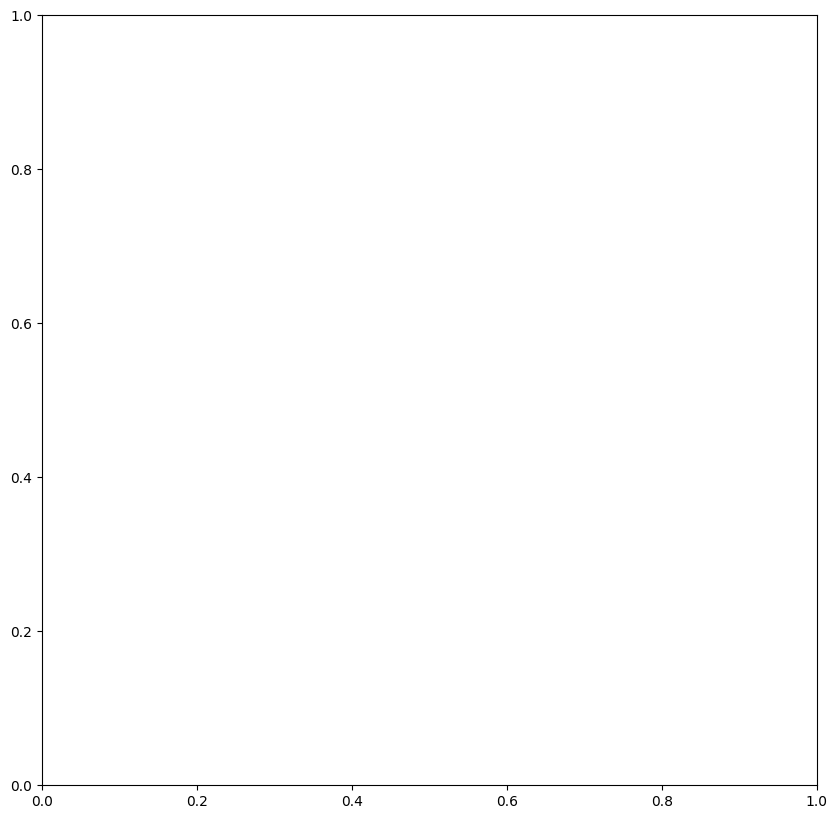

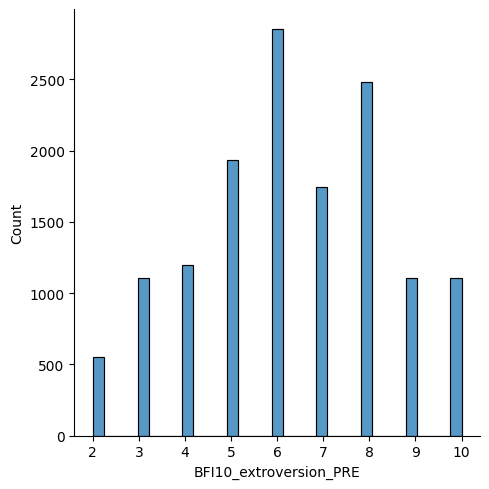

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

rapids_allday_pre_temp = filter_rapids(rapids, 'allday')
rapids_allday_pre = merge_dataframes(rapids_allday_pre_temp, pre) # import pre data into rapids dataframe

del rapids_allday_pre_temp # delete the temporary dataframe to save memory

sns.displot(rapids_allday_pre, x='BFI10_extroversion_PRE')

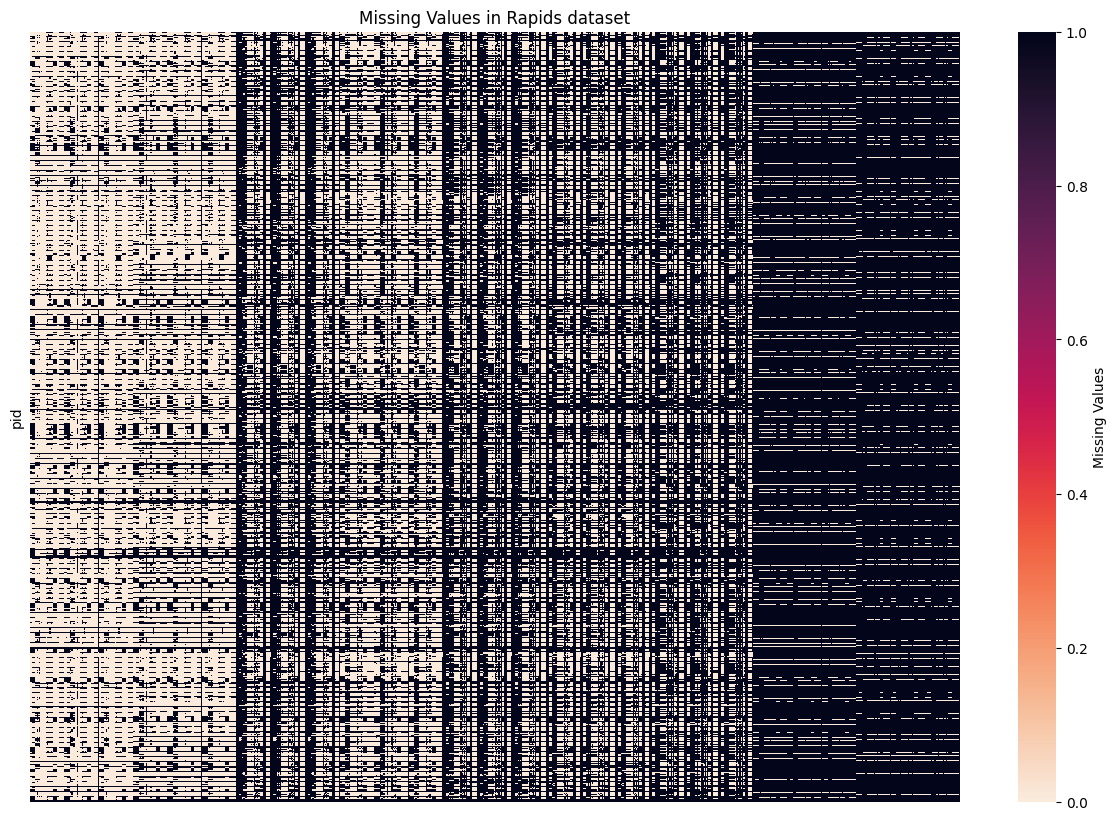

In [46]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(rapids.isna(), cbar=True, cmap='rocket_r', yticklabels=False, xticklabels=False, cbar_kws={'label': 'Missing Values'}, annot=False)
ax.title.set_text('Missing Values in Rapids dataset')
plt.savefig('./figures/rapids_missing_values.png', dpi=300, bbox_inches='tight')

### Bluetooth

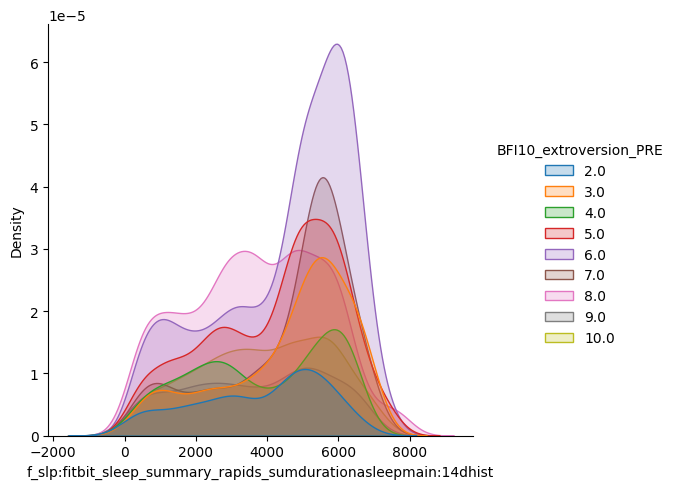

In [85]:
bt_14dhist_temp = filter_rapids(rapids, '14dhist')
bt_14dhist = merge_dataframes(bt_14dhist_temp, pre) # import dep_endterm data into rapids dataframe
del bt_14dhist_temp # delete the temporary dataframe to save memory

fig1 = sns.displot(bt_14dhist, x='f_slp:fitbit_sleep_summary_rapids_sumdurationasleepmain:14dhist', hue="BFI10_extroversion_PRE", kind='kde', fill=True, palette='tab10')

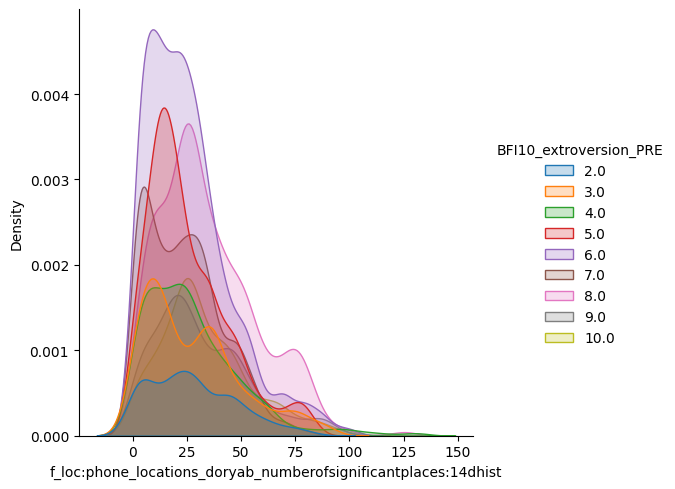

In [ ]:
fig1 = sns.displot(bt_14dhist, x='f_loc:phone_locations_doryab_numberofsignificantplaces:14dhist', hue="BFI10_extroversion_PRE", kind='kde', fill=True, palette='tab10')

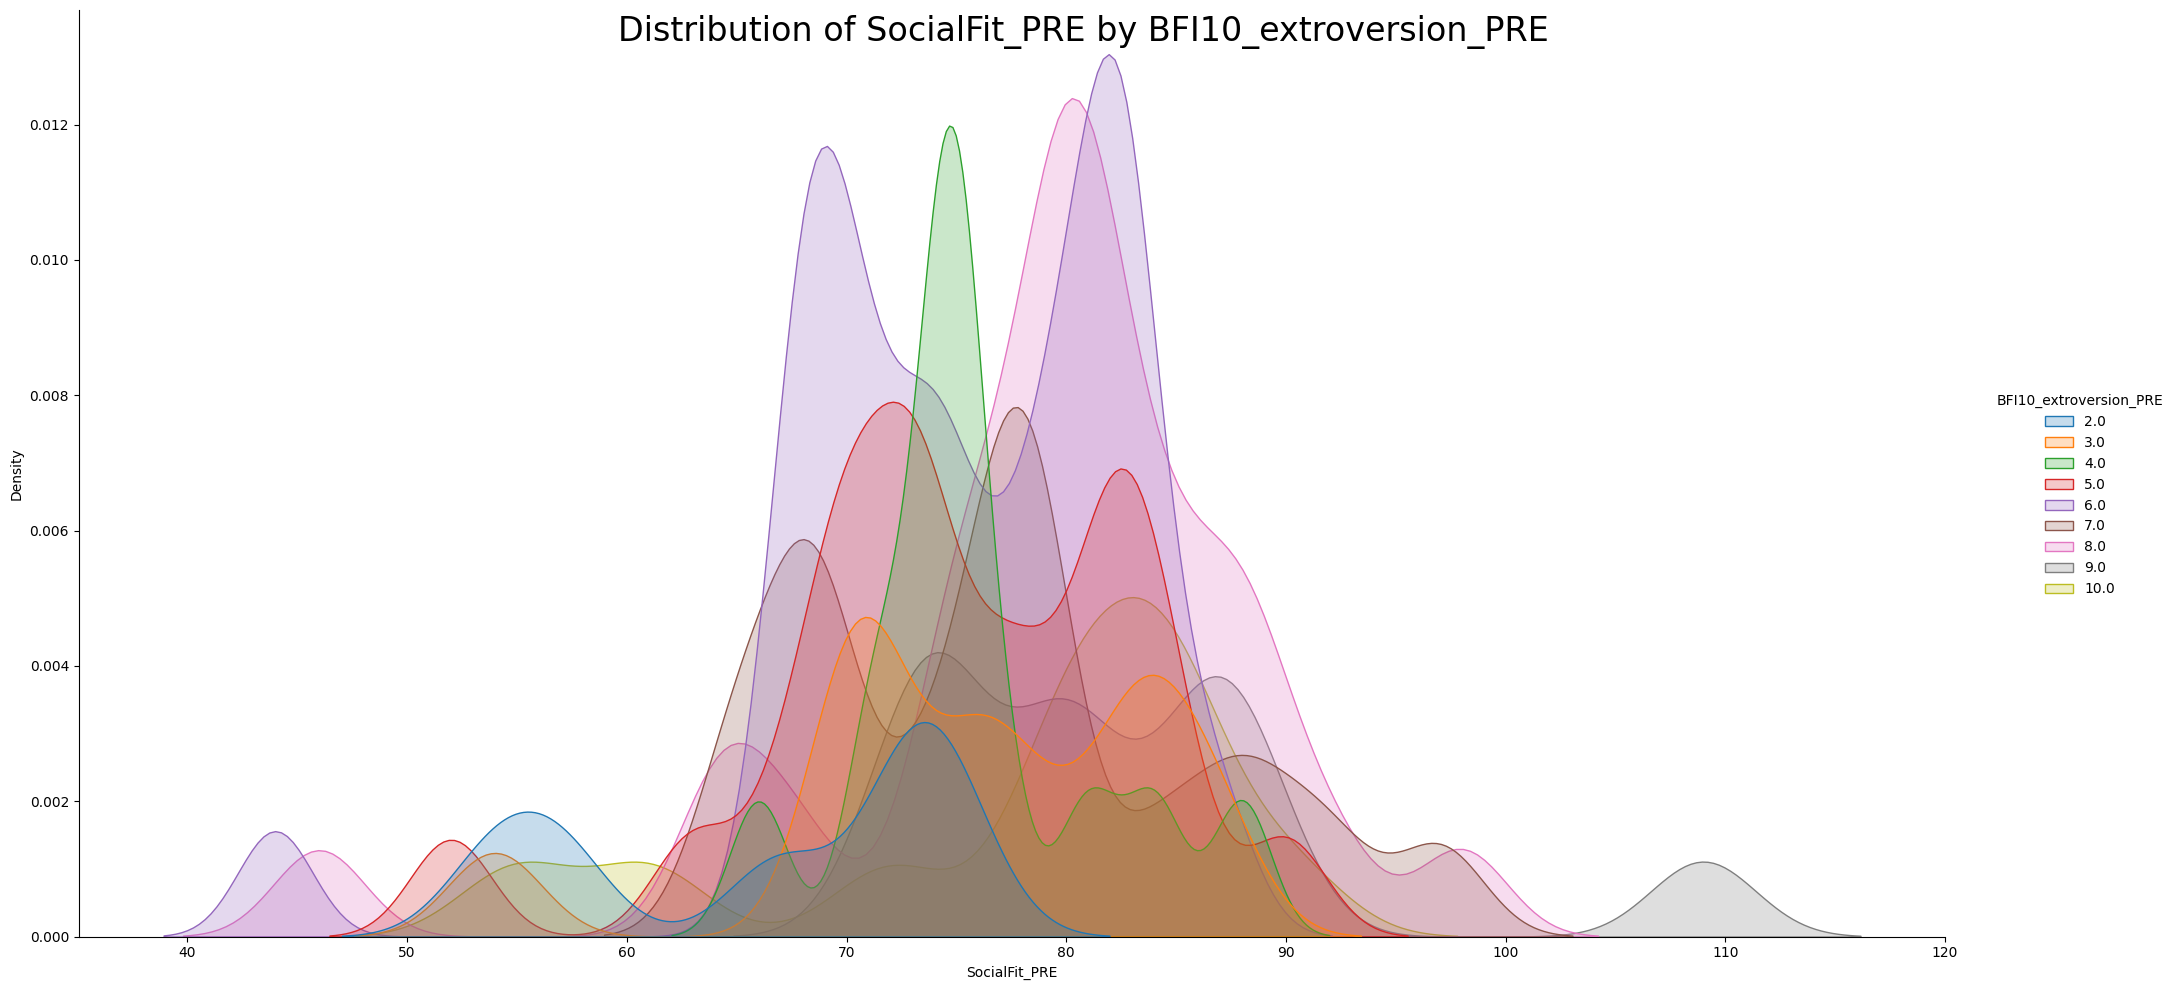

In [94]:
fig2 = sns.displot(bt_14dhist, x='SocialFit_PRE', hue="BFI10_extroversion_PRE", kind='kde', fill=True, palette='tab10', height=10, aspect=2)
fig2.figure.suptitle("Distribution of SocialFit_PRE by BFI10_extroversion_PRE", fontsize=24)
fig2.savefig('./figures/SocialFit_PRE_by_BFI10_extroversion_PRE.png', dpi=300, bbox_inches='tight')

In [55]:
for col in bt_14dhist:
    print(col)

pid
date_x
f_slp:fitbit_sleep_summary_rapids_sumdurationafterwakeupmain:14dhist
f_slp:fitbit_sleep_summary_rapids_sumdurationasleepmain:14dhist
f_slp:fitbit_sleep_summary_rapids_sumdurationawakemain:14dhist
f_slp:fitbit_sleep_summary_rapids_sumdurationtofallasleepmain:14dhist
f_slp:fitbit_sleep_summary_rapids_sumdurationinbedmain:14dhist
f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:14dhist
f_slp:fitbit_sleep_summary_rapids_avgdurationafterwakeupmain:14dhist
f_slp:fitbit_sleep_summary_rapids_avgdurationasleepmain:14dhist
f_slp:fitbit_sleep_summary_rapids_avgdurationawakemain:14dhist
f_slp:fitbit_sleep_summary_rapids_avgdurationtofallasleepmain:14dhist
f_slp:fitbit_sleep_summary_rapids_avgdurationinbedmain:14dhist
f_slp:fitbit_sleep_summary_rapids_countepisodemain:14dhist
f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:14dhist
f_slp:fitbit_sleep_summary_rapids_lastbedtimemain:14dhist
f_slp:fitbit_sleep_summary_rapids_firstwaketimemain:14dhist
f_slp:fitbit_sleep_summary_rapids_l